In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
url1="https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv"
url2="https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv"
data = pd.read_csv(url1)
weather = pd.read_csv(url2)

In [3]:
print(data.isnull().sum())
print(weather.isnull().sum())

Unnamed: 0       0
year             0
month            0
day              0
dep_time      8255
dep_delay     8255
arr_time      8713
arr_delay     9430
carrier          0
tailnum       2512
flight           0
origin           0
dest             0
air_time      9430
distance         0
hour          8255
minute        8255
dtype: int64
Unnamed: 0      0
origin          0
year            0
month           1
day             1
hour            1
temp            1
dewp            1
humid           1
wind_dir      233
wind_speed      1
wind_gust       1
precip          0
pressure      939
visib           0
dtype: int64


In [4]:
data.drop(["Unnamed: 0", "minute","year","arr_time","arr_delay","air_time","dep_time","tailnum","flight","dest","distance"], 1, inplace=True)

In [5]:
data=data.dropna()

In [6]:
weather.tail(15)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
8704,8705,EWR,2013,12.0,30.0,19.0,37.04,21.02,51.95,320.0,17.26170,19.864419,0.0,1017.6,10.0
8705,8706,EWR,2013,12.0,30.0,20.0,35.06,17.96,49.30,340.0,17.26170,19.864419,0.0,1019.1,10.0
8706,8707,EWR,2013,12.0,30.0,21.0,33.08,15.98,48.98,320.0,14.96014,17.215830,0.0,1019.8,10.0
8707,8708,EWR,2013,12.0,30.0,22.0,30.92,12.92,46.74,340.0,16.11092,18.540125,0.0,1020.5,10.0
8708,8709,EWR,2013,12.0,30.0,23.0,28.94,12.02,48.69,330.0,14.96014,17.215830,0.0,1021.1,10.0
8709,8710,JFK,2013,2.0,18.0,4.0,17.96,-0.94,42.69,290.0,29.92028,34.431660,0.0,1016.2,10.0
8710,8711,JFK,2013,2.0,20.0,19.0,32.00,8.06,36.03,280.0,26.46794,30.458776,0.0,1011.2,10.0
8711,8712,JFK,2013,7.0,2.0,11.0,71.60,69.80,94.06,180.0,11.50780,13.242946,0.0,NaN,0.5
8712,8713,JFK,2013,7.0,2.0,13.0,71.60,69.80,94.06,190.0,10.35702,11.918651,0.0,NaN,1.0
8713,8714,JFK,2013,7.0,31.0,6.0,71.06,55.04,56.93,320.0,8.05546,9.270062,0.0,1020.4,10.0


In [7]:
weather.drop(['wind_dir',"pressure","year","origin","Unnamed: 0","temp","dewp","humid","wind_gust","precip"], axis=1, inplace=True)
weather=weather[:-10]
weather=weather.dropna()

In [8]:
data=data.merge(weather,on=["month","day","hour"])

In [9]:
data.sample(5)

,month,day,dep_delay,carrier,origin,hour,wind_speed,visib
46869,10,23,-4.0,MQ,LGA,7.0,0.00000,10.0
59336,11,5,-9.0,MQ,EWR,19.0,8.05546,10.0
180172,4,23,-6.0,EV,EWR,6.0,10.35702,10.0
20984,1,25,-10.0,US,LGA,9.0,5.75390,10.0
282108,8,12,2.0,UA,EWR,15.0,3.45234,10.0


In [10]:
delayed_data=data[data["dep_delay"]>0]

1) How time of day affects delay?

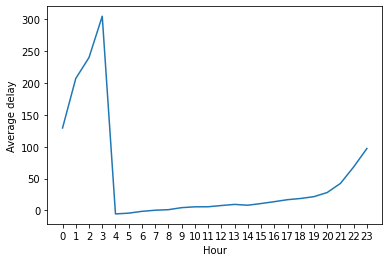

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Number of flights,875,223,64,11,302,7167,22568,21405,26360,18823,...,20425,22724,22286,22092,21502,19850,16089,10881,5452,2610


In [11]:
plt.plot(np.sort(data["hour"].unique()),data.groupby("hour").mean()["dep_delay"])
plt.xlabel('Hour')
plt.ylabel('Average delay')
plt.xticks(np.arange(24))
plt.show()
data["hour"].value_counts().sort_index().to_frame().T.rename(index= {"hour": 'Number of flights'})

Night hours have fewer flights but bigger delays.

2) How different months affect delay?

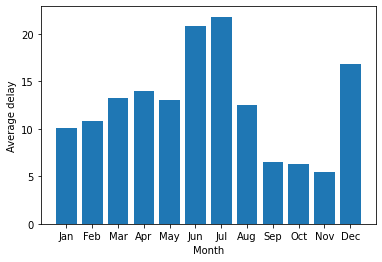

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number of flights,26466,23599,27949,27659,28232,27233,28315,28771,27072,28553,26967,26326


In [12]:
plt.bar(np.sort(data["month"].unique()),data.groupby("month").mean()["dep_delay"])
plt.xlabel('Month')
plt.ylabel('Average delay')
plt.xticks(np.arange(12)+1, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()
data["month"].value_counts().sort_index().to_frame().T.rename(index= {"month": 'Number of flights'},columns={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul",8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

There are bigger delays during "holyday" months, despite them having roughly the same amount of flights as others.

3) How weekdays affect delay?

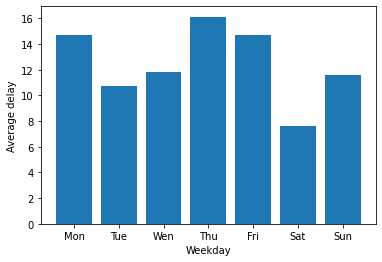

,Mon,Tue,Wen,Thu,Fri,Sat,Sun
Number of flights,49309,48383,48604,48595,48694,37918,45639


In [13]:
data["weekday"]=list(map(lambda x,y:dt.datetime(2013, x, y).isoweekday(),data["month"],data["day"]))
plt.bar(np.sort(data["weekday"].unique()),data.groupby("weekday").mean()["dep_delay"])
plt.xlabel('Weekday')
plt.ylabel('Average delay')
plt.xticks(np.arange(7)+1, ["Mon", "Tue", "Wen", "Thu", "Fri", "Sat", "Sun"])
plt.show()
data["weekday"].value_counts().sort_index().to_frame().T.rename(index= {"weekday": 'Number of flights'},columns={1:"Mon", 2:"Tue", 3:"Wen", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun"})

All working days have the same amount of flights but those surrounding weekends tend to get delayed for longer

4) Let's look at different carriers.

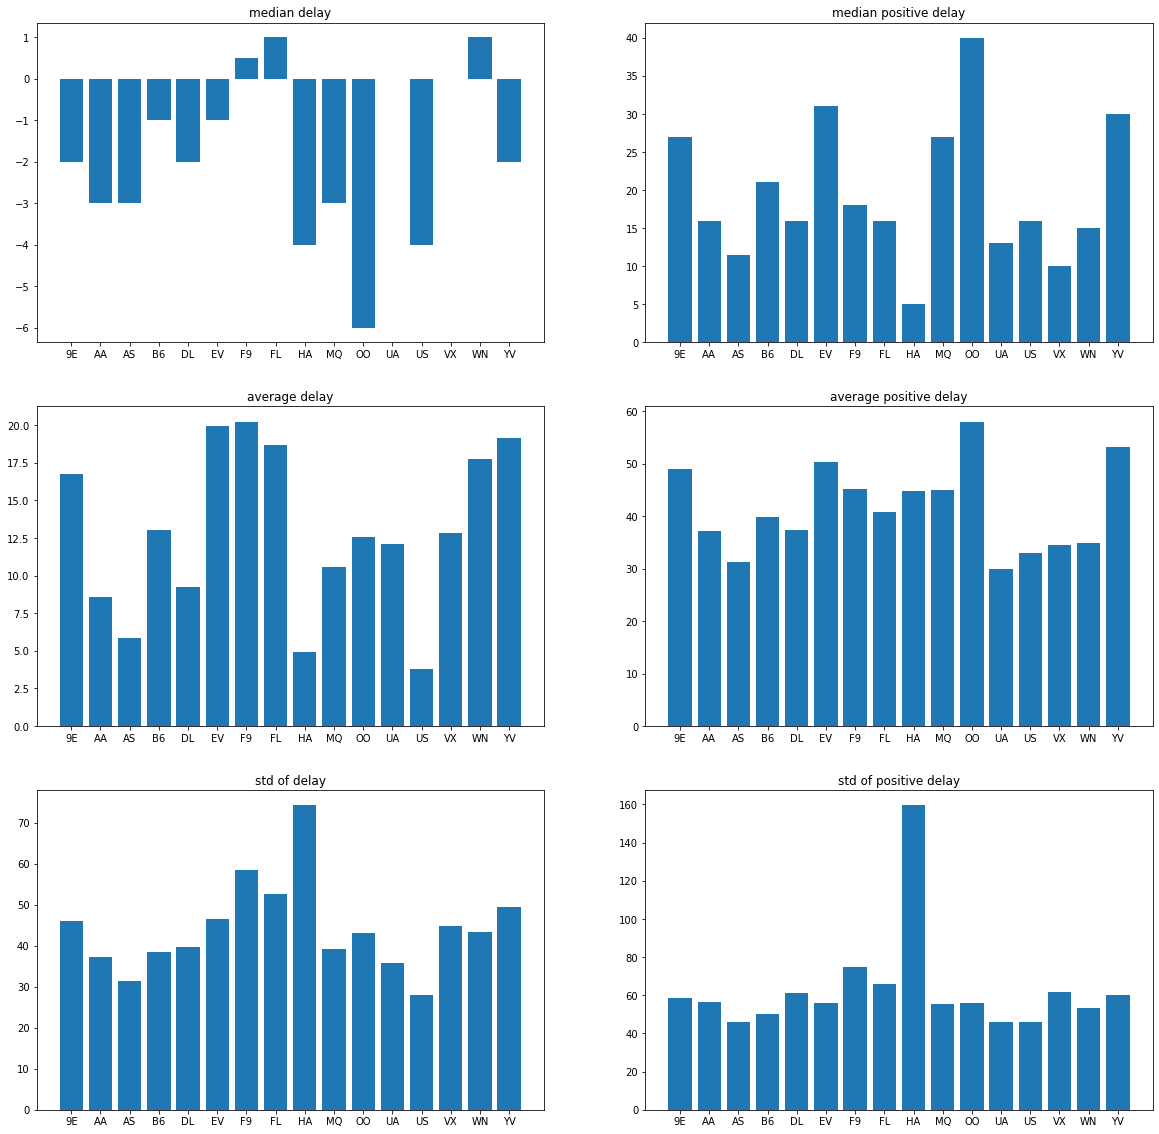

,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
flights,17352,31954,710,53881,47551,51185,680,3175,341,25064,29,57744,19795,5113,12028,540
delayed flights,7046,10114,226,21317,15167,23073,340,1647,69,8000,9,27147,4761,2217,6530,232


In [14]:
f,ax=plt.subplots(3,2,figsize=(20,20))
ax[0,0].bar(np.sort(data["carrier"].unique()),data.groupby("carrier").median()["dep_delay"])
ax[0,0].set_title("median delay")
ax[1,0].bar(np.sort(data["carrier"].unique()),data.groupby("carrier").mean()["dep_delay"])
ax[1,0].set_title("average delay")
ax[2,0].bar(np.sort(data["carrier"].unique()),data.groupby("carrier").std()["dep_delay"])
ax[2,0].set_title("std of delay")
ax[0,1].bar(np.sort(data["carrier"].unique()),delayed_data.groupby("carrier").median()["dep_delay"])
ax[0,1].set_title("median positive delay")
ax[1,1].bar(np.sort(data["carrier"].unique()),delayed_data.groupby("carrier").mean()["dep_delay"])
ax[1,1].set_title("average positive delay")
ax[2,1].bar(np.sort(data["carrier"].unique()),delayed_data.groupby("carrier").std()["dep_delay"])
ax[2,1].set_title("std of positive delay")
plt.show()
pd.concat([data["carrier"].value_counts(),delayed_data["carrier"].value_counts()],1,keys=["flights","delayed flights"]).sort_index().T

HA and OO have some strange results, but that is almost certainly because they are the least flying ones. OO has only 29 flights with 9 delayed.
FL and WN have more than half of their flights delayed and one of the biggest average delays. However half of their delayed flights depart in under ~15 minutes and their average positive delay is, well, average.
F9, UA and VX have ~half of their flights delayed. UA, the biggest carrier, has the lowest average positive delay at ~30 minutes.
US is the best carrier among the big ones with the lowest average delay and generally good numbers.
AS and YV are the last two small carriers and AS is a way better one. On almost all graphs AS is among the best and YV is among the worst.
9E and EV are the worst performers from big carriers with both delay and positive delay on the longer side.
AA, B6, DL, MQ are pretty average.

5) How visibility affects delay?

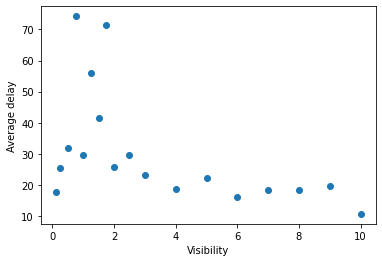

,0.12,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.50,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
Number of flights,125,1473,1700,260,1127,51,1794,155,3874,2204,4259,3244,4653,6153,6279,6170,13132,270489


In [15]:
plt.scatter(np.sort(data["visib"].unique()),data.groupby("visib").mean()["dep_delay"])
plt.xlabel('Visibility')
plt.ylabel('Average delay')
plt.show()
data["visib"].value_counts().sort_index().to_frame().T.rename(index= {"visib": 'Number of flights'})

Lower values of visibility obviously lack enough data, but overall the trend is clear: the lower the visibility, the longer the delay.

6) How wind speed affects delay?

In [16]:
normal_wind_data=data[data["wind_speed"]!=1048.36058]
normal_wind_delayed_data=normal_wind_data[normal_wind_data["dep_delay"]>0]

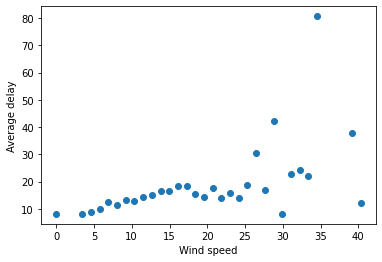

,0.00000,3.45234,4.60312,5.75390,6.90468,8.05546,9.20624,10.35702,11.50780,12.65858,...,26.46794,27.61872,28.76950,29.92028,31.07106,32.22184,33.37262,34.52340,39.12652,40.27730
Number of flights,24681,21445,26767,30120,30114,28143,28807,24270,23272,20010,...,250,727,236,120,192,47,155,39,39,53


In [17]:
plt.scatter(np.sort(normal_wind_data["wind_speed"].unique()),normal_wind_data.groupby("wind_speed").mean()["dep_delay"])
plt.xlabel('Wind speed')
plt.ylabel('Average delay')
plt.show()
normal_wind_data["wind_speed"].value_counts().sort_index().to_frame().T.rename(index= {"wind_speed": 'Number of flights'})

Situation with wind speed is pretty similar with that of visibility. Little data but visible trend. It's quite possible these are somehow correlated.

7) Let's look at airports

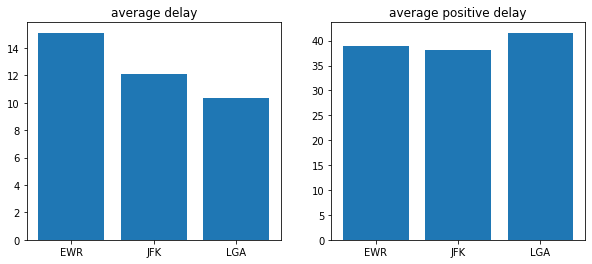

,EWR,JFK,LGA
flights,117126,108930,101086
delayed flights,52512,41833,33550


In [18]:
f,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].bar(np.sort(data["origin"].unique()),data.groupby("origin").mean()["dep_delay"])
ax[0].set_title("average delay")
ax[1].bar(np.sort(data["origin"].unique()),delayed_data.groupby("origin").mean()["dep_delay"])
ax[1].set_title("average positive delay")
plt.show()
pd.concat([data["origin"].value_counts(),delayed_data["origin"].value_counts()],1,keys=["flights","delayed flights"]).sort_index().T

In average delay and percentage of delays airports go in size order. But LGA has the highest average positive delay with ~10% longer delays than JFK.